# Travelling Salesman Problem

The Travelling Salesman Problem describes a salesman who must travel between N cities. The order in which he does so is something he does not care about, as long as he visits each city during his trip, and finishes where he was at first.

It can be solved by different methods like dynamic programming, genetic algorithm implementation etc. But ultimately the algorithm has to return the minimal distance to cover all the cities.

<img src="TSP_Image.png">

# Let's get to the work

## Import the packages

In [1]:
import random
import operator

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

style.use('fivethirtyeight')

## Random cost matrix from each city to all other cities

This basically gives a random distance from one city to another city. Suppose we have four cities namely `[1, 2, 3, 4]` and we want to a matrix having the distance from one city to another city. This can be done by a cost matrix function that assigns a random distance value.

**Cost matrix**

| s\t || 1 | 2 | 3 | 4 |
| --- || --- | --- | --- | --- |
| **1**| | **0** | 4 | 5 | 7 |
| **2**| | 3 | **0** | 8 | 10 |
| **3**| | 5 | 9 | **0** | 4 |
| **4**| | 6 | 10 | 5 | **0** |

The diagonal values are `0` as the distance from source to source will always be `0`. The below function sets the distance / cost matrix for the required number of cities that is passed as an argument.

In [2]:
def SetCostMatrix(num):
    cmatrix = {}
    for i in range(1, num + 1):
        for j in range(1, num + 1):
            if i == j:
                cmatrix[(i, j)] = 0
            else:
                cmatrix[(i, j)] = random.randint(10, 50)
    return cmatrix

In [3]:
total_num = 10
num_cities = SetCostMatrix(total_num)

The above `SetCostMatrix(10)` returns a dictionary have `{(row, col) : distance}`. 

## Get the cost or distance value from one city to another city

In order to get the distance / cost value pertaining to the source and the target city, the function checks for the key and returns the value. It is been validated for every case in which it initially checks the distance between `target` and `source`. And in the following cases it iteratively performs the same task and obtains the minimal cost / distance.

In [4]:
def GetCostVal(row, col, source):
    if col == 0:
        col = source
        return num_cities[(row, col)]
    return num_cities[(row, col)]

In [5]:
GetCostVal(3, 0, 2)

28

## Get the possible source city and rest all target cities

By implementing TSP algorithm it should be obvius that travelling from any source city to all other target cities, salesman should connect each target from source exactly once and should reach where he had started.

In [6]:
def GetPossibilites(cities_count):
    cities = list(range(1, cities_count + 1))
    possibilities = {}
    for city in cities:
        dtars = cities[:]
        dtars.remove(city)
        possibilities[city] = dtars
    return possibilities

### If there are 10 cities, then 10 possibilities

In [7]:
GetPossibilites(total_num)

{1: [2, 3, 4, 5, 6, 7, 8, 9, 10],
 2: [1, 3, 4, 5, 6, 7, 8, 9, 10],
 3: [1, 2, 4, 5, 6, 7, 8, 9, 10],
 4: [1, 2, 3, 5, 6, 7, 8, 9, 10],
 5: [1, 2, 3, 4, 6, 7, 8, 9, 10],
 6: [1, 2, 3, 4, 5, 7, 8, 9, 10],
 7: [1, 2, 3, 4, 5, 6, 8, 9, 10],
 8: [1, 2, 3, 4, 5, 6, 7, 9, 10],
 9: [1, 2, 3, 4, 5, 6, 7, 8, 10],
 10: [1, 2, 3, 4, 5, 6, 7, 8, 9]}

Source city should be exactly one and rest all are target cities. Therefore the possible source cities can be any one from total number of cities. If there are `n` cities, then there are `n` combinations in which each city has a chance to be a source city. 

## Recursive function to get the minimum distance from source to target cities

It is an iterative process for which it selects the best minimal value in order to solve the problem. The formula that is been implemented is:

$$ G \big \langle 1, V - \{s\} \big \rangle = min \Bigg[ \ c \ (1, \ k) + G \big \langle k, V - \{1, \ k\} \big \rangle \Bigg] \\ where \ (2 \leq k \leq n) \ and \ V = \{ 1, 2, \dots, n \} $$

The below computes this mathematical equation for all the targets with respect to source city and takes the minimal distance that satiates the salesman. I will also print the processing steps how it is working.

In [8]:
iterative_process = []
def TSPGetMinDistance(main_source, source, cities):
    if len(cities) == 1:
        minDis = GetCostVal(source, cities[0], main_source) + GetCostVal(cities[0], 0, main_source)
        return minDis
    else:
        Dist = []
        for city in cities:
            dcities = cities[:]
            dcities.remove(city)
            Dist.append(GetCostVal(source, city, source) + TSPGetMinDistance(main_source, city, dcities))
        iterative_process.append(Dist)
        return min(Dist)

The list - `iterative_process` shows the step by step result how the algorithm is processing. It shows the result staring from the second step as the result for the 1st step will be used in the following steps. The result of `iterative_process[-1]` shows total cost to reach to the source after connecting each target. It consists of different costs but the ultimate goal of this algorithm is to show the minimal cost or distance required for a salesman to complete his task by reaching out all the cities. Hence the iterative learning.

In [9]:
TSPGetMinDistance(1, 1, [2, 3, 4, 5, 6, 7, 8, 9, 10])
iterative_process[-1]

[179, 189, 171, 177, 177, 199, 167, 145, 181]

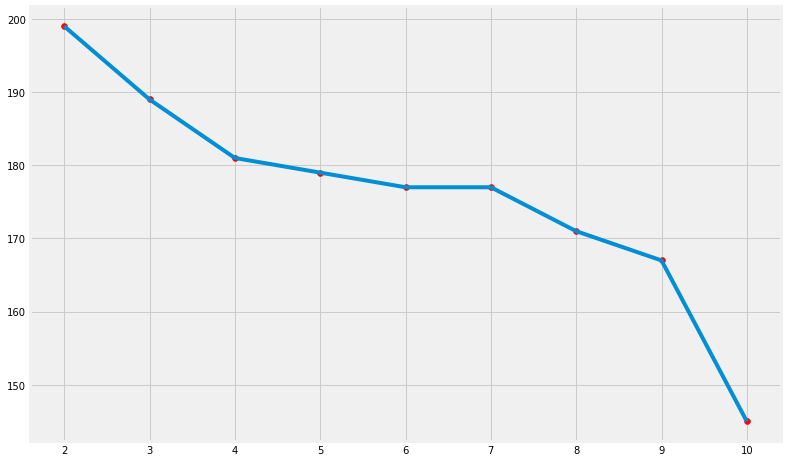

In [10]:
plt.figure(figsize=(12, 8))

final_costs = sorted(iterative_process[-1])
final_costs = final_costs[::-1]

plt.scatter(list(range(2, len(final_costs) + 2)), final_costs, color='red')
plt.plot(list(range(2, len(final_costs) + 2)), final_costs)

The plot shows the clear visualization in which the algorithm gives the minimal distance in order to travel all the cities and get back to source city. Hence the **Travelling Salesman Problem**.

In order to compare the results by considering different source cities (The result will be same although). We make use of `GetPossibilities(num)` function that returns a dictionary having keys as sources and values as target cities. We obtain the same result for each different source (that's whole point of this algorithm).

In [11]:
def CompareDiffSources(num):
    distances = {}
    possibilities = GetPossibilites(num)
    for source, cities in possibilities.items():
        distances[source] = TSPGetMinDistance(source, source, cities)
    return distances

## Possible minimum distance from each source

In [12]:
distances = CompareDiffSources(total_num)
distances

{1: 145,
 2: 145,
 3: 145,
 4: 145,
 5: 145,
 6: 145,
 7: 145,
 8: 145,
 9: 145,
 10: 145}

Clearly we can see the same cost or distance from each differnt source city. Hence we can say that the algorithm works fine. But it's performance is too slow when the number of cities increase to `n`.

# Genetic Algorithm for implementing TSP

Basically, GA uses the heuristic search methods in order to find the optimum solution by the basis of natural theory selection and evolutionary biology. The heuristic search method is technique designed for solving a problem more quickly when classic methods are too slow. It is widely used in the field of Artificial Intelligence, Mathematical Optimization etc.

Genetic algorithms are excellent for searching through large and complex data sets in a handy way. Four important things that a GA uses to find the solution are:

* Chromosome
* Crossover
* Mutation
* Survival of fittest (Natural Evolution)

## Procedure

1. Generate randomly `k` chromosomes called population.
    * Each chromosome represents an individual solution.
2. Create `k-offspring` through `crossover` and `mutation`.
    * **Crossover** : Analogous to reproduction and bilogical crossover. More than one parent is selected and one or more offsprings are produced using genetic material of the parents.
    <img src="crossover.png">
    * **Mutation** : It is small small tweak in the chromosome to get a new solution. It is a part to GA that help chromosomes in exploration of the search space.
    <img src="mutation.gif">
    
    Finally it will have `2k` chromosomes (initial `k` chromosome + `k` chromosomes after crossover or mutation).
3. Usage of fitness function to select the best `k` chromosomes among the existing `2k` chromosomes.
4. Repeat the whole process until the iteration threshold value is reached.
5. The resultant `k` chromosomes are the best fit for the problem.

**With regard to TSP, it is all about finding the least cost or distance path by using above conditions.**

The fitness function returns the minimal total distance of the path.

### Let us consider `10` cities 

In [13]:
source_city = 1
target_cities = [2, 3, 4, 5, 6, 7, 8, 9, 10]
random_dists = [round(random.uniform(0.20, 0.90), 3) for i in target_cities]
chromosome1 = pd.DataFrame()
chromosome1['target_1'] = target_cities
chromosome1['dist_1'] = random_dists
chromosome1 = chromosome1.sort_values('dist_1', ascending=True)
chromosome1.reset_index(inplace=True)
chromosome1.drop(columns=['index'], axis=1, inplace=True)
chromosome1

,target_1,dist_1
0,2,0.226
1,8,0.271
2,6,0.314
3,9,0.466
4,10,0.498
5,7,0.503
6,4,0.675
7,5,0.752
8,3,0.759


In [14]:
path = '1 >'
for tar in chromosome1['target_1']:
    path += ' ' + str(tar) + ' ' + '>' 
path = path + ' ' + '1'
print('Shortest path : ', path)

Shortest path :  1 > 2 > 8 > 6 > 9 > 10 > 7 > 4 > 5 > 3 > 1


In [15]:
source_city = 1
target_cities = [2, 3, 4, 5, 6, 7, 8, 9, 10]
random_dists = [round(random.uniform(0.20, 0.90), 3) for i in target_cities]
chromosome2 = pd.DataFrame()
chromosome2['target_2'] = target_cities
chromosome2['dist_2'] = random_dists
chromosome2 = chromosome2.sort_values('dist_2', ascending=True)
chromosome2.reset_index(inplace=True)
chromosome2.drop(columns=['index'], axis=1, inplace=True)
chromosome2

,target_2,dist_2
0,5,0.273
1,10,0.365
2,2,0.378
3,9,0.380
4,7,0.383
5,6,0.459
6,4,0.652
7,3,0.675
8,8,0.791


In [16]:
path = '1 >'
for tar in chromosome2['target_2']:
    path += ' ' + str(tar) + ' ' + '>' 
path = path + ' ' + '1'
print('Shortest path : ', path)

Shortest path :  1 > 5 > 10 > 2 > 9 > 7 > 6 > 4 > 3 > 8 > 1


## Crossover implementation

In [17]:
parent_1 = [1]
for tar in chromosome1['target_1']:
    parent_1.append(tar)
parent_2 = [1]
for tar in chromosome2['target_2']:
    parent_2.append(tar)
print('Parent 1 : ', parent_1)
print('Parent 2 : ', parent_2)

Parent 1 :  [1, 2, 8, 6, 9, 10, 7, 4, 5, 3]
Parent 2 :  [1, 5, 10, 2, 9, 7, 6, 4, 3, 8]


In [18]:
genetic_code_1 = []
for i in parent_1:
    if len(genetic_code_1) < 3:
        code = random.choice(parent_1)
        if code not in genetic_code_1:
            genetic_code_1.append(code)
        else : code = random.choice(parent_1)
# -----
genetic_code_2 = []
for i in parent_2:
    if len(genetic_code_2) < 3:
        code = random.choice(parent_2)
        if code not in genetic_code_2:
            genetic_code_2.append(code)
        else : code = random.choice(parent_2)

print('Genetic code 1 : ', genetic_code_1)
print('Genetic code 2 : ', genetic_code_2)

Genetic code 1 :  [3, 5, 4]
Genetic code 2 :  [6, 5, 9]


In [19]:
offspring_1 = parent_2[:]
for i in genetic_code_1:
    offspring_1.remove(i)
dummy_gcode_1 = genetic_code_1[:]
random.shuffle(dummy_gcode_1)
offspring_1.extend(dummy_gcode_1)
# -----
offspring_2 = parent_1[:]
for i in genetic_code_2:
    offspring_2.remove(i)
dummy_gcode_2 = genetic_code_2[:]
random.shuffle(dummy_gcode_2)
offspring_2.extend(dummy_gcode_2)

print('Offspring 1 : ', offspring_1)
print('Offspring 2 : ', offspring_2)

Offspring 1 :  [1, 10, 2, 9, 7, 6, 8, 3, 5, 4]
Offspring 2 :  [1, 2, 8, 10, 7, 4, 3, 6, 9, 5]


## Mutation implementation

In [20]:
offspring_1 = parent_1[:]
for code in genetic_code_1:
    offspring_1.remove(code)
rand_index = random.randint(1, 6)
for i in genetic_code_1:
    offspring_1.insert(rand_index, i)
    rand_index += 1
# -----
offspring_2 = parent_1[:]
for code in genetic_code_2:
    offspring_2.remove(code)
rand_index = random.randint(1, 6)
for i in genetic_code_2:
    offspring_2.insert(rand_index, i)
    rand_index += 1

print('Offspring 1 : ', offspring_1)
print('Offspring 2 : ', offspring_2)

Offspring 1 :  [1, 2, 8, 6, 3, 5, 4, 9, 10, 7]
Offspring 2 :  [1, 2, 8, 10, 6, 5, 9, 7, 4, 3]


Now that we have `4` offsprings out of `2` chromosomes, we will have to select the best chromosome and the best solution, that can be done by a minimizing function (one which has been implemeted above).

**Conclusion**

1. At times, this approach may not be able to find good solution.
2. We can implement other deterministic methods like `Kruskal's minimal spanning tree` etc.
3. Ultimately it should find the global minimum (minimal of all local minimums) cost value for the above case.

**References**

1. Google Images

2. Medium atricle $\rightarrow$ https://medium.com/@becmjo/genetic-algorithms-and-the-travelling-salesman-problem-d10d1daf96a1

3. Wikipedia page $\rightarrow$ https://simple.wikipedia.org/wiki/Travelling_salesman_problem

4. YouTube video $\rightarrow$ https://www.youtube.com/watch?v=3GAfjE_ChRI